In [1]:
cd ../

/Users/dimitreoliveira/Desktop/stable-diffusion-textual-inversion-app


## Dependencies

In [2]:
import keras_cv
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
# from app.utils import load_finetuned_weights

You do not have Waymo Open Dataset installed, so KerasCV Waymo metrics are not available.


## Auxiliary functions

In [3]:
def plot_images(images: np.ndarray) -> None:
    plt.figure(figsize=(20, 20))
    for i in range(len(images)):
        ax = plt.subplot(1, len(images), i + 1)
        plt.imshow(images[i])
        plt.axis("off")

## Parameters

In [4]:
prompt_token = "<token>"
text_encoder_path = "./models/example/text_encoder/keras"

## Load and rebuild model

In [5]:
stable_diffusion = keras_cv.models.StableDiffusion()
stable_diffusion.tokenizer.add_tokens(prompt_token)

loaded_text_encoder_ = tf.keras.models.load_model(text_encoder_path)
stable_diffusion._text_encoder = loaded_text_encoder_
stable_diffusion._text_encoder.compile(jit_compile=True)

By using this model checkpoint, you acknowledge that its usage is subject to the terms of the CreativeML Open RAIL-M license at https://raw.githubusercontent.com/CompVis/stable-diffusion/main/LICENSE


## Inference

2023-01-22 18:20:53.135677: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-01-22 18:20:53.461009: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x29fb61ec0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2023-01-22 18:20:53.461030: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): Host, Default Version
2023-01-22 18:20:53.582181: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-01-22 18:20:55.237786: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089
50/50 [==============================] - 1663s 33s/step


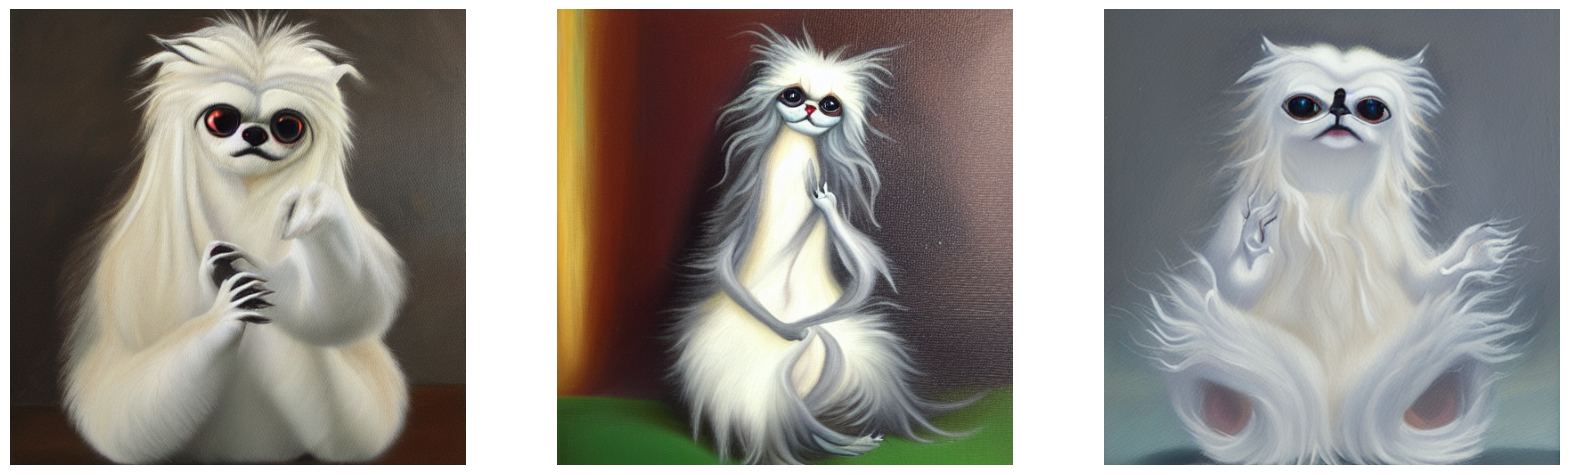

In [6]:
generated = stable_diffusion.text_to_image(
    f"an oil painting of {prompt_token}",
    batch_size=3,
)
plot_images(generated)

50/50 [==============================] - 1922s 38s/step


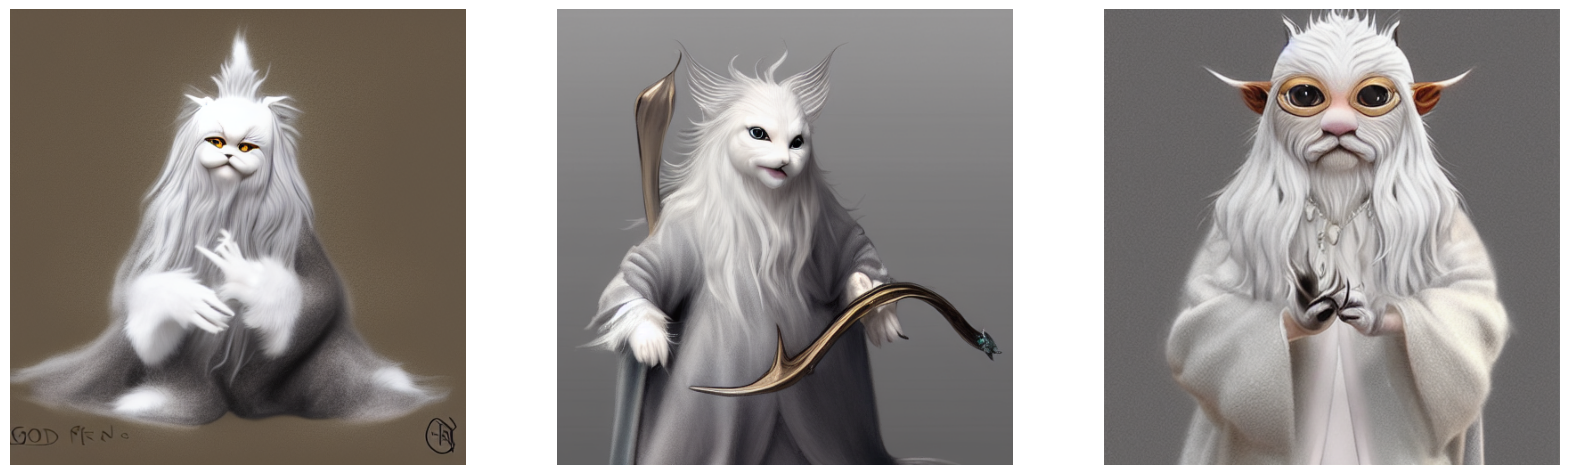

In [7]:
generated = stable_diffusion.text_to_image(
    f"Gandalf as a {prompt_token} fantasy art drawn by disney concept artists, "
    "golden colour, high quality, highly detailed, elegant, sharp focus, concept art, "
    "character concepts, digital painting, mystery, adventure",
    batch_size=3,
)
plot_images(generated)

50/50 [==============================] - 2034s 41s/step


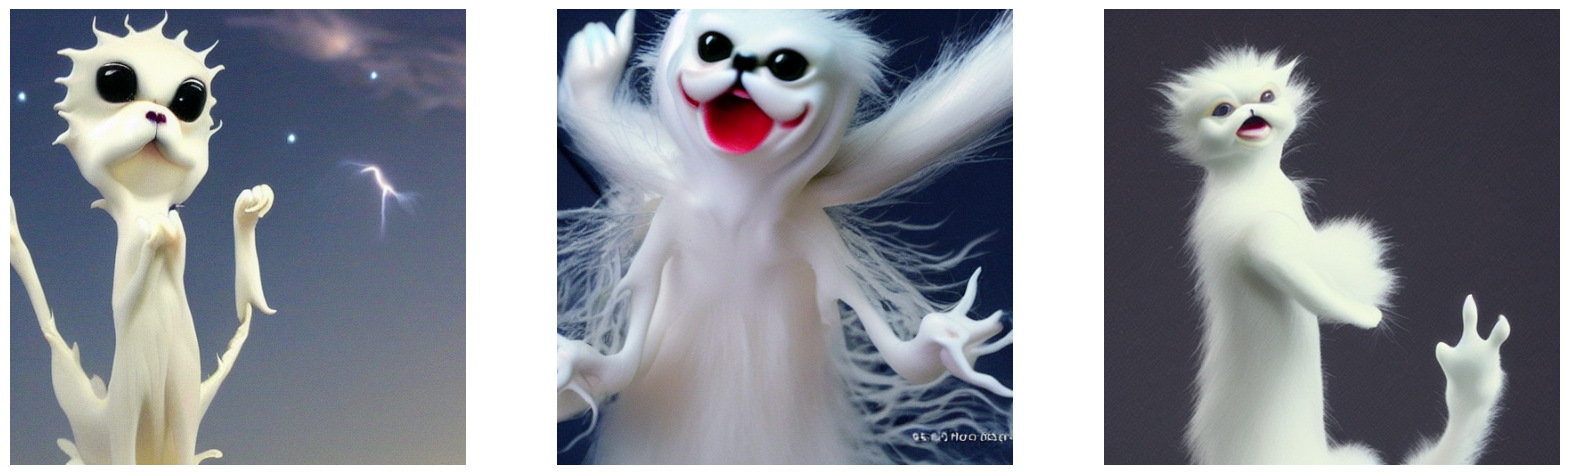

In [8]:
generated = stable_diffusion.text_to_image(
    f"A masterpiece of a {prompt_token} crying out to the heavens. "
    f"Behind the {prompt_token}, an dark, evil shade looms over it - sucking the "
    "life right out of it.",
    batch_size=3,
)
plot_images(generated)

50/50 [==============================] - 2021s 40s/step


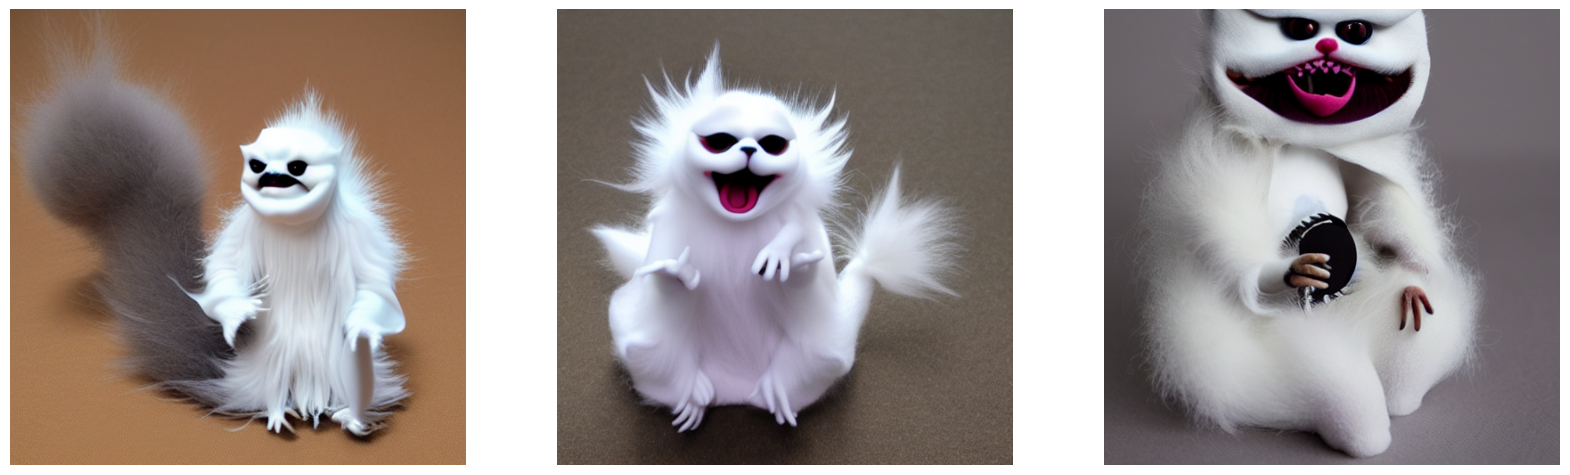

In [9]:
generated = stable_diffusion.text_to_image(
    f"An evil {prompt_token}.", 
    batch_size=3
)
plot_images(generated)

50/50 [==============================] - 2028s 40s/step


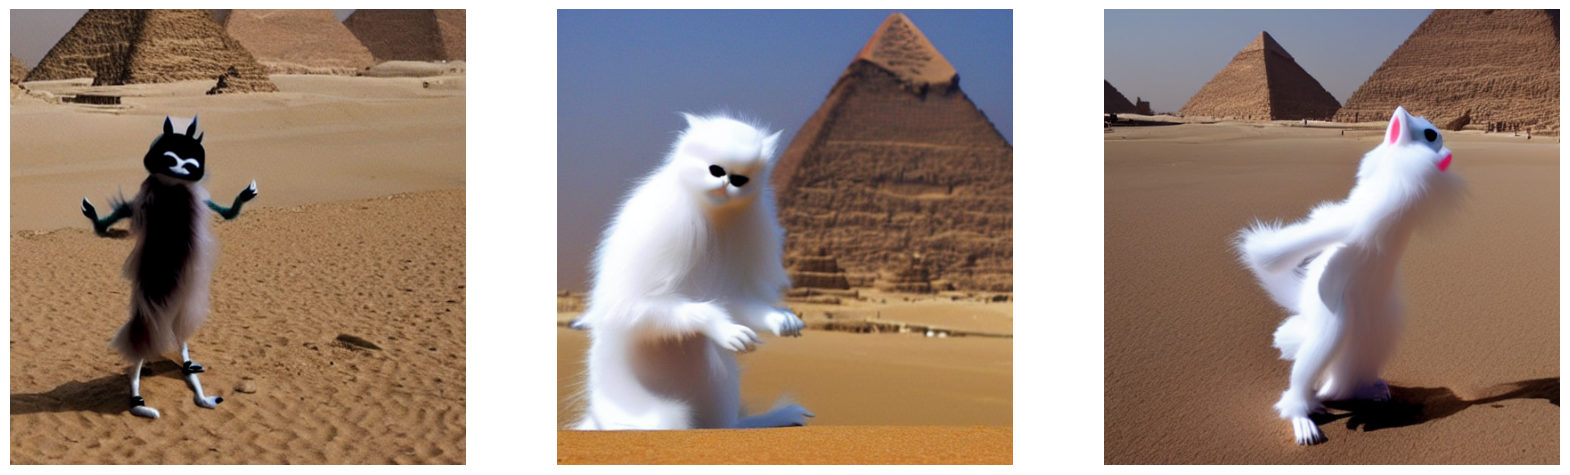

In [10]:
generated = stable_diffusion.text_to_image(
    f"A mysterious {prompt_token} approaches the great pyramids of egypt.",
    batch_size=3,
)
plot_images(generated)